# Fast Walkthrough : TPS JAN 2k22

This notebook holds a short and brief approach in submitting solutions for TPS competitions.

Do **upvote** if you like it.

In [1]:
# Importing basic data manipulation libraies

import numpy as np
import pandas as pd

In [2]:
# Filtering warning so that they do not appear on the notebook

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Paths

train_data_path = '../input/tabular-playground-series-jan-2022/train.csv'
test_data_path = '../input/tabular-playground-series-jan-2022/test.csv'

In [4]:
# Loading Train Data

train_df = pd.read_csv(train_data_path)
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
# Loading Test Data

test_df = pd.read_csv(test_data_path)
test_df.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [6]:
# splitting the feature into understandable format

train_df['year'] = train_df['date'].apply(lambda x : int(x.split('-')[0]))
train_df['month'] = train_df['date'].apply(lambda x : int(x.split('-')[1]))
train_df['day'] = train_df['date'].apply(lambda x : int(x.split('-')[2]))
train_df.drop('date', 1, inplace = True)
train_df.head()

,row_id,country,store,product,num_sold,year,month,day
0,0,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


In [7]:
test_df['year'] = test_df['date'].apply(lambda x : int(x.split('-')[0]))
test_df['month'] = test_df['date'].apply(lambda x : int(x.split('-')[1]))
test_df['day'] = test_df['date'].apply(lambda x : int(x.split('-')[2]))
test_df.drop('date', 1, inplace = True)
test_df.head()

,row_id,country,store,product,year,month,day
0,26298,Finland,KaggleMart,Kaggle Mug,2019,1,1
1,26299,Finland,KaggleMart,Kaggle Hat,2019,1,1
2,26300,Finland,KaggleMart,Kaggle Sticker,2019,1,1
3,26301,Finland,KaggleRama,Kaggle Mug,2019,1,1
4,26302,Finland,KaggleRama,Kaggle Hat,2019,1,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
 5   year      26298 non-null  int64 
 6   month     26298 non-null  int64 
 7   day       26298 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.6+ MB


In [9]:
test_df.head()

,row_id,country,store,product,year,month,day
0,26298,Finland,KaggleMart,Kaggle Mug,2019,1,1
1,26299,Finland,KaggleMart,Kaggle Hat,2019,1,1
2,26300,Finland,KaggleMart,Kaggle Sticker,2019,1,1
3,26301,Finland,KaggleRama,Kaggle Mug,2019,1,1
4,26302,Finland,KaggleRama,Kaggle Hat,2019,1,1


#### Checking the data splitt through various category / features.

In [10]:
train_df.country.value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [11]:
test_df.country.value_counts()

Finland    2190
Norway     2190
Sweden     2190
Name: country, dtype: int64

In [12]:
train_df.store.value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

In [13]:
test_df.store.value_counts()

KaggleMart    3285
KaggleRama    3285
Name: store, dtype: int64

In [14]:
train_df.year.value_counts()

2016    6588
2015    6570
2017    6570
2018    6570
Name: year, dtype: int64

In [15]:
test_df.year.value_counts()

2019    6570
Name: year, dtype: int64

In [16]:
train_df.month.value_counts()

1     2232
3     2232
5     2232
7     2232
8     2232
10    2232
12    2232
4     2160
6     2160
9     2160
11    2160
2     2034
Name: month, dtype: int64

In [17]:
test_df.month.value_counts()

1     558
3     558
5     558
7     558
8     558
10    558
12    558
4     540
6     540
9     540
11    540
2     504
Name: month, dtype: int64

In [18]:
train_df.day.value_counts()

1     864
2     864
28    864
27    864
26    864
25    864
24    864
23    864
22    864
21    864
20    864
19    864
18    864
17    864
16    864
15    864
14    864
13    864
12    864
11    864
10    864
9     864
8     864
7     864
6     864
5     864
4     864
3     864
29    810
30    792
31    504
Name: day, dtype: int64

In [19]:
test_df.day.value_counts()

1     216
2     216
28    216
27    216
26    216
25    216
24    216
23    216
22    216
21    216
20    216
19    216
18    216
17    216
16    216
15    216
14    216
13    216
12    216
11    216
10    216
9     216
8     216
7     216
6     216
5     216
4     216
3     216
29    198
30    198
31    126
Name: day, dtype: int64

In [20]:
train_df['product'].value_counts()

Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64

In [21]:
test_df['product'].value_counts()

Kaggle Mug        2190
Kaggle Hat        2190
Kaggle Sticker    2190
Name: product, dtype: int64

### EDA : Exploratory Data Analysis

Now checking through some inter-feature covariance .

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

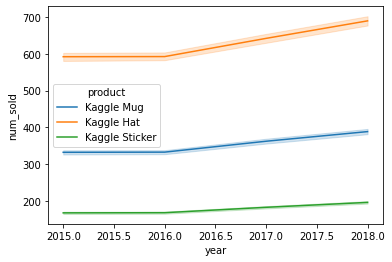

In [23]:
# Checking the number of sold products by their respective year.

sns.lineplot(x = 'year', y = 'num_sold', hue = 'product', data = train_df)
plt.show()

We can see num_sold increase slightly with year.

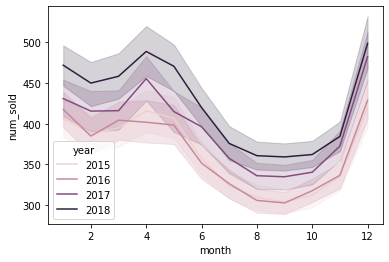

In [24]:
# Checking the number of sold products by their respective month.

sns.lineplot(x = 'month', y = 'num_sold', hue = 'year', data = train_df)
plt.show()

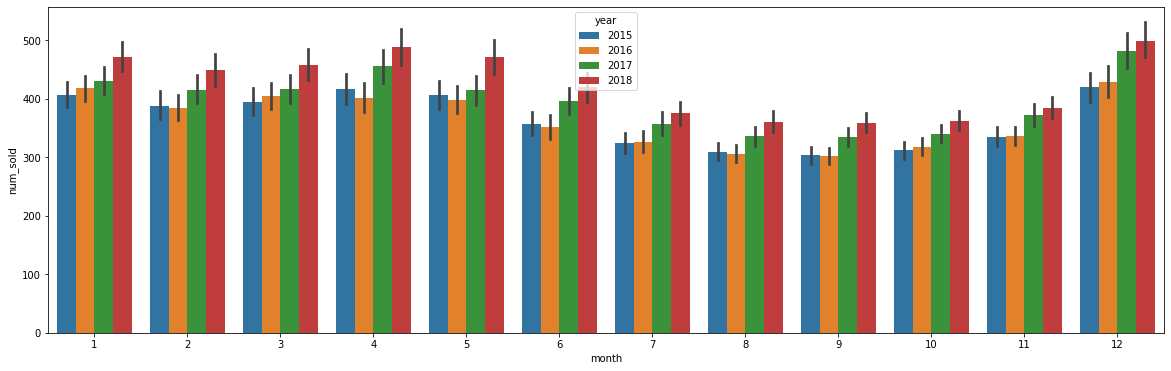

In [25]:
# Checking the number of sold products per month through years.

plt.figure(figsize = (20, 6))
sns.barplot(x = 'month', y = 'num_sold', hue = 'year', data = train_df)
plt.show()

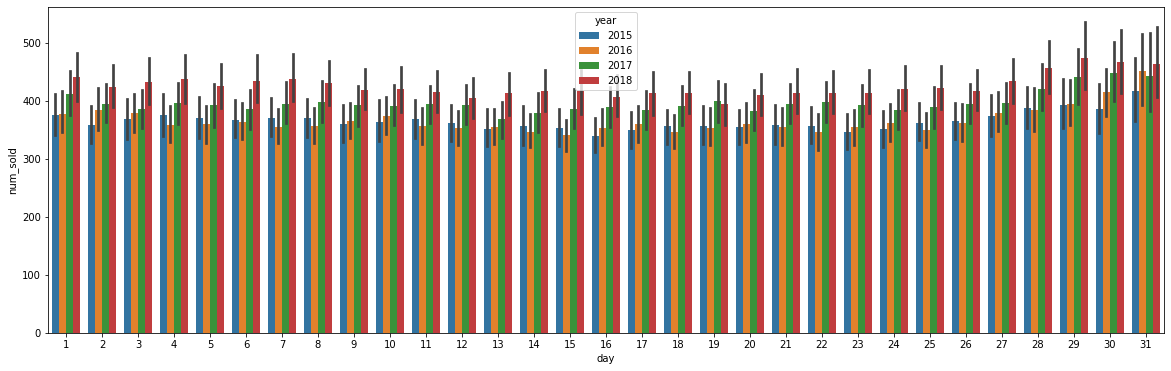

In [26]:
# Checking the number of sold products per mdate through years.

plt.figure(figsize = (20, 6))
sns.barplot(x = 'day', y = 'num_sold', hue = 'year', data = train_df)
plt.show()

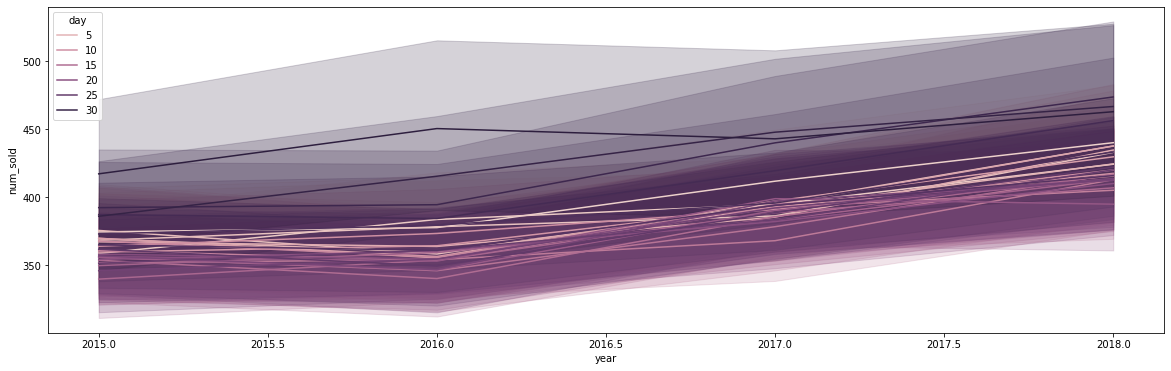

In [27]:
plt.figure(figsize = (20, 6))
sns.lineplot(x = 'year', y = 'num_sold', hue = 'day', data = train_df)
plt.show()

In [28]:
train_df.head()

,row_id,country,store,product,num_sold,year,month,day
0,0,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


As we've checked the feature, now it's time to encode the categorical features. In this sceanrio, the categorical features have a uniform distribution of less common unqiue labels, that's why I've used one hot encoding which can be a great tool to prepare the data more accurately.

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# One Hot Encoding

train = train_df.copy()
test = test_df.copy()


for feature in test.columns:
    if test[feature].dtype == 'object':
        train_feature_data = train[feature]
        train_encoded_feature = pd.get_dummies(train_feature_data)
        train.drop(feature, 1, inplace = True)
        train = pd.concat([train, train_encoded_feature], axis = 1)
        
        test_feature_data = test[feature]
        test_encoded_feature = pd.get_dummies(test_feature_data)
        test.drop(feature, 1, inplace = True)
        test = pd.concat([test, test_encoded_feature], axis = 1)

In [31]:
train.head()

,row_id,num_sold,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,0,329,2015,1,1,1,0,0,1,0,0,1,0
1,1,520,2015,1,1,1,0,0,1,0,1,0,0
2,2,146,2015,1,1,1,0,0,1,0,0,0,1
3,3,572,2015,1,1,1,0,0,0,1,0,1,0
4,4,911,2015,1,1,1,0,0,0,1,1,0,0


In [32]:
test.head()

,row_id,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,26298,2019,1,1,1,0,0,1,0,0,1,0
1,26299,2019,1,1,1,0,0,1,0,1,0,0
2,26300,2019,1,1,1,0,0,1,0,0,0,1
3,26301,2019,1,1,1,0,0,0,1,0,1,0
4,26302,2019,1,1,1,0,0,0,1,1,0,0


Now, scaling the year as if not it may give this feature too much importance.

In [33]:
train.year = train.year.apply(lambda x : x - 2015)
test.year = test.year.apply(lambda x : x - 2015)

In [34]:
train.head()

,row_id,num_sold,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,0,329,0,1,1,1,0,0,1,0,0,1,0
1,1,520,0,1,1,1,0,0,1,0,1,0,0
2,2,146,0,1,1,1,0,0,1,0,0,0,1
3,3,572,0,1,1,1,0,0,0,1,0,1,0
4,4,911,0,1,1,1,0,0,0,1,1,0,0


In [35]:
test.head()

,row_id,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,26298,4,1,1,1,0,0,1,0,0,1,0
1,26299,4,1,1,1,0,0,1,0,1,0,0
2,26300,4,1,1,1,0,0,1,0,0,0,1
3,26301,4,1,1,1,0,0,0,1,0,1,0
4,26302,4,1,1,1,0,0,0,1,1,0,0


Now, in this scenario we'll use 2 models which will be Regression models from XGB and RandomForest. and we'll blend the outputs of them to find the answers or the predictions.

In [36]:
from xgboost import XGBRegressor as xgbr

In [37]:
baseline_model = xgbr()
print(baseline_model)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [38]:
target = train.num_sold
train.drop('num_sold', 1 , inplace = True)
train.head()

,row_id,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,0,0,1,1,1,0,0,1,0,0,1,0
1,1,0,1,1,1,0,0,1,0,1,0,0
2,2,0,1,1,1,0,0,1,0,0,0,1
3,3,0,1,1,1,0,0,0,1,0,1,0
4,4,0,1,1,1,0,0,0,1,1,0,0


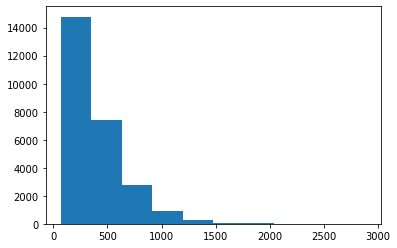

In [39]:
plt.hist(target)
plt.show()

We also have to prepare the train and the validation set so that we can understand the overfit quality of the model and wheter it should be discarded or not.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state = 42)

In [42]:
X_train.head()

,row_id,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
25456,25456,3,11,15,1,0,0,0,1,1,0,0
14983,14983,2,4,12,0,1,0,1,0,1,0,0
18009,18009,2,9,27,0,1,0,0,1,0,1,0
22326,22326,3,5,25,0,1,0,1,0,0,1,0
10114,10114,1,7,15,0,0,1,0,1,1,0,0


In [43]:
X_val.head()

,row_id,year,month,day,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
15429,15429,2,5,7,1,0,0,0,1,0,1,0
14903,14903,2,4,7,0,0,1,0,1,0,0,1
2973,2973,0,6,15,1,0,0,0,1,0,1,0
15267,15267,2,4,28,1,0,0,0,1,0,1,0
22153,22153,3,5,15,0,0,1,1,0,1,0,0


In [44]:
%%time
baseline_model.fit(X_train, y_train)

CPU times: user 4.74 s, sys: 12.9 ms, total: 4.75 s
Wall time: 1.23 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
baseline_model.score(X_train,y_train)

0.9818697646671104

In [46]:
baseline_model.score(X_val, y_val)

0.973262193903784

In [47]:
y_pred = baseline_model.predict(test)
y_pred

array([ 462.5903,  645.7235,  218.5234, ...,  986.0292, 1458.9998,
        406.8893], dtype=float32)

In [48]:
submission_format = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')
submission_format.head()

,row_id,num_sold
0,26298,100
1,26299,100
2,26300,100
3,26301,100
4,26302,100


In [49]:
submission_data = submission_format
submission_data.head()

,row_id,num_sold
0,26298,100
1,26299,100
2,26300,100
3,26301,100
4,26302,100


In [50]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [51]:
rfr_model = rfr(n_estimators = 50)
print(rfr_model)

RandomForestRegressor(n_estimators=50)


In [52]:
%%time
rfr_model.fit(X_train, y_train)

CPU times: user 2.54 s, sys: 48 ms, total: 2.59 s
Wall time: 2.59 s


RandomForestRegressor(n_estimators=50)

In [53]:
rfr_model.score(X_train, y_train)

0.9931386632142013

In [54]:
rfr_model.score(X_val, y_val)

0.9510680617750253

In [55]:
rfr_y_pred = rfr_model.predict(test)

Now we'll blend the outputs from both the models and use that as our target prediction.

In [56]:
submission_data.num_sold = rfr_y_pred * 0.5 + y_pred * 0.5

In [57]:
# Pushing the data into a csv file for submission.
submission_data.to_csv('blend1.csv', index = False)

# Thanks for walking through this notebok :)

## You can find other cool works of me on [kaggle](https://kaggle.com/sagnik1511) or on [github](https://github.com/sagnik1511)

# Thank You :)